<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [3]:
 !conda install -c conda-forge pydotplus -y
 !conda install -c conda-forge python-graphviz -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    pydotplus: 2.0.2-py_2 conda-forge

pydotplus-2.0. 100% |################################| Time: 0:00:00  19.32 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    python-graphviz: 0.10.1-py_0 conda-forge

python-graphvi 100% |################################| Time: 0:00:00  15.35 MB/s


In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.image as mpimg
import pydotplus
from matplotlib.ticker import NullFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, metrics, tree, svm
from sklearn.externals.six import StringIO
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [6]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-04-05 16:19:38--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-04-05 16:19:38 (11.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [7]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [265]:
df.shape

(346, 10)

### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [10]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  42.37 MB/s


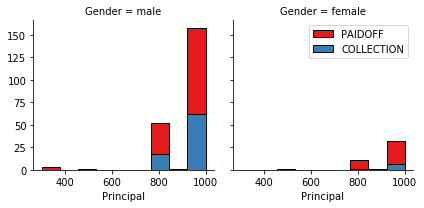

In [12]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

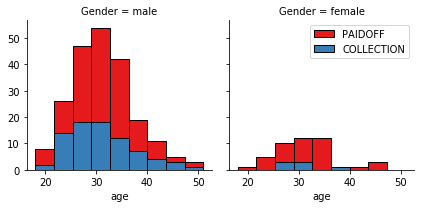

In [13]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

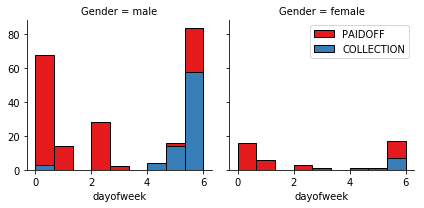

In [14]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [15]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [17]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [18]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [19]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [20]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [22]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



 Notice:
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

Spliting the data

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6)
print("Dataframe length:", len(X))
print("Train set (80%):", x_train.shape)
print("Test set (20%):", x_test.shape)

Dataframe length: 346
Train set (80%): (276, 8)
Test set (20%): (70, 8)


Checking which is the best _K_ neighbors out of 10 to get the best score possible.

In [25]:
Ks = 30
mean_acc = np.zeros((Ks - 1))
for i in range(1, Ks):
    knn_model = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    h = knn_model.predict(x_test)
    mean_acc[i - 1] = metrics.accuracy_score(y_test, h)

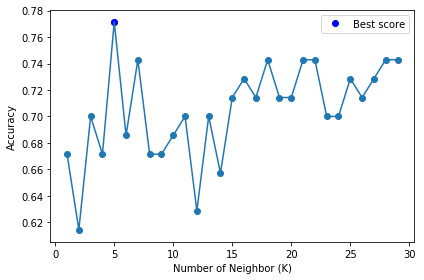

Best accuracy: 0.771428571429 with k =  5


In [26]:
plt.plot(mean_acc.argmax() + 1, mean_acc.max(), 'bo')
plt.legend(('Best score', ''))
plt.scatter(range(1, Ks), mean_acc)
plt.plot(range(1, Ks), mean_acc)
plt.xlabel("Number of Neighbor (K)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()
best_k = mean_acc.argmax() + 1
print("Best accuracy:", mean_acc.max(), "with k = ", best_k)

In [27]:
knn = KNeighborsClassifier(n_neighbors = best_k).fit(x_train, y_train)
knn_prediction = knn.predict(x_test)

print("Train set jaccard_similarity_score: ", metrics.jaccard_similarity_score(y_train, knn.predict(x_train)))
print("Test set jaccard_similarity_score: ", metrics.jaccard_similarity_score(y_test, knn_prediction), "\n")
print("Train set f1_score: ", metrics.f1_score(y_train, knn.predict(x_train), average='weighted'))
print("Test set f1_score: ", metrics.f1_score(y_test, knn_prediction, average='weighted'))

Train set jaccard_similarity_score:  0.81884057971
Test set jaccard_similarity_score:  0.771428571429 

Train set f1_score:  0.81507622812
Test set f1_score:  0.771428571429


# Decision Tree

In [49]:
decision_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [50]:
decision_tree_model.fit(x_train, y_train)
tree_prediction = decision_tree_model.predict(x_test)

In [51]:
print("Train set jaccard_similarity_score: ", metrics.jaccard_similarity_score(y_train, decision_tree_model.predict(x_train)))
print("Test set jaccard_similarity_score: ", metrics.jaccard_similarity_score(y_test, tree_prediction), "\n")
print("Train set f1_score: ", metrics.f1_score(y_train, decision_tree_model.predict(x_train), average='weighted'))
print("Test set f1_score: ", metrics.f1_score(y_test, tree_prediction, average='weighted'))

Train set jaccard_similarity_score:  0.764492753623
Test set jaccard_similarity_score:  0.728571428571 

Train set f1_score:  0.757513897952
Test set f1_score:  0.718199973372


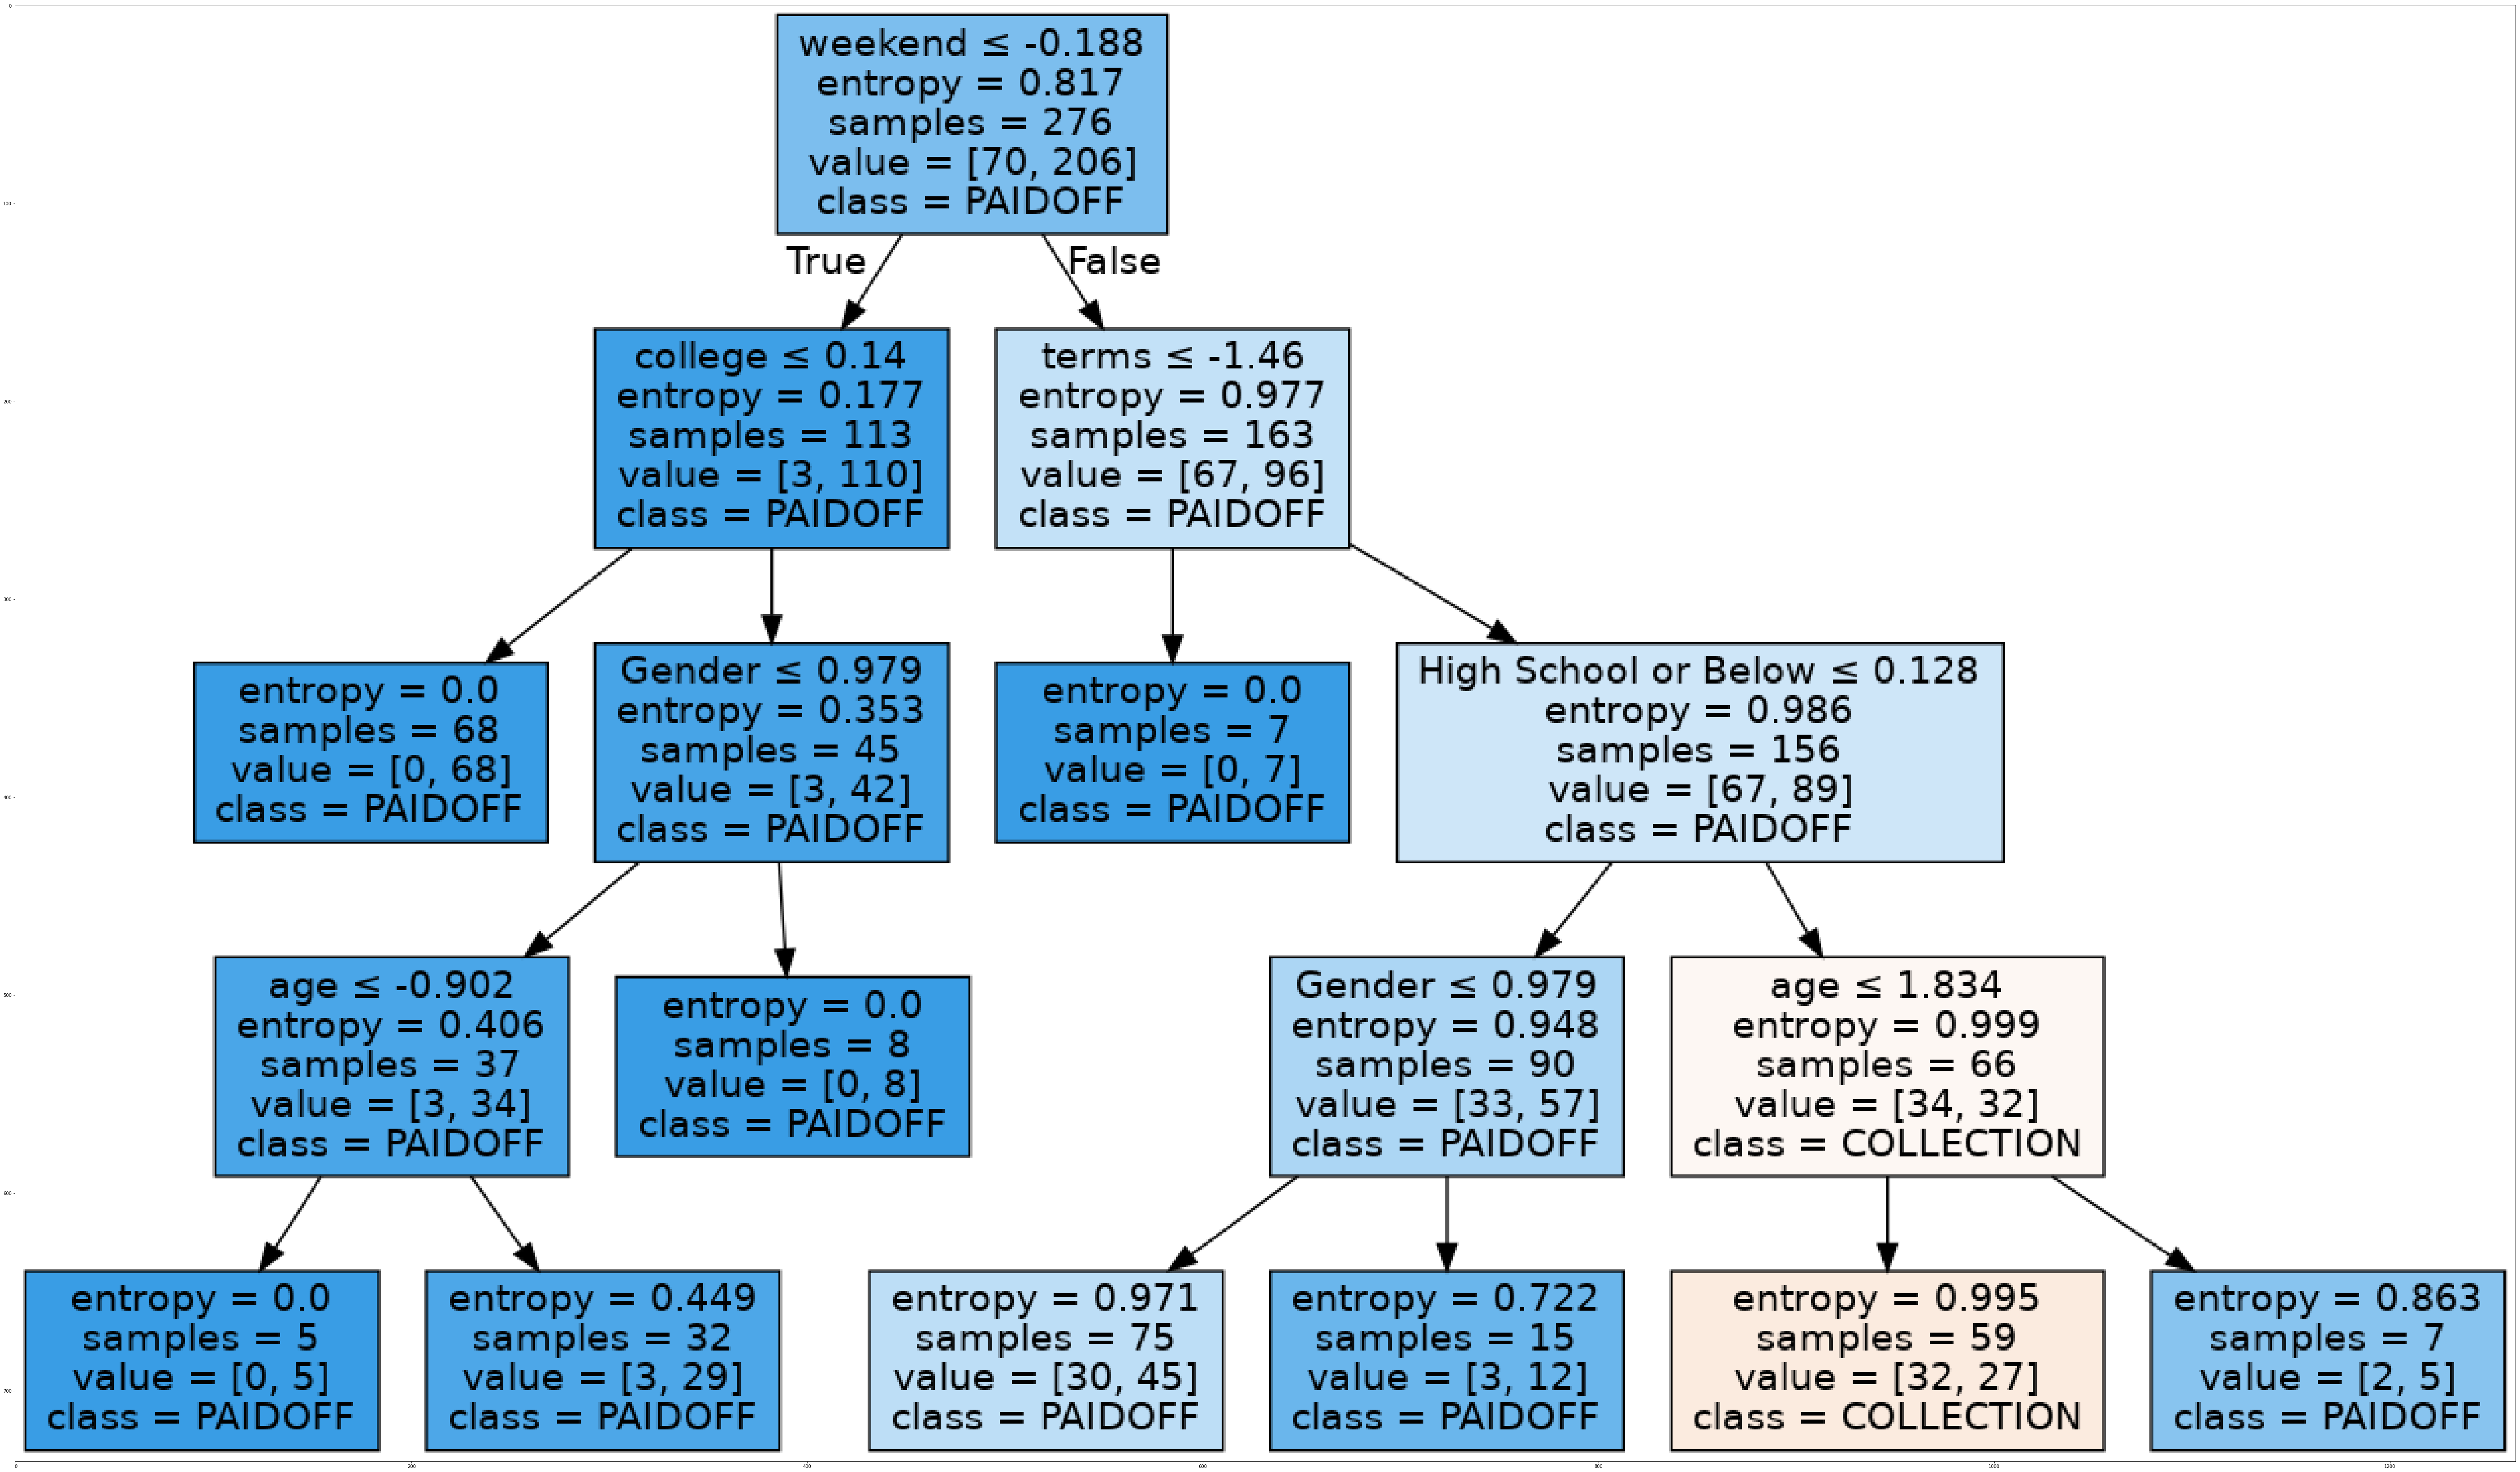

In [52]:
dot_data = StringIO()
filename = "tree_model.png"
featureNames = Feature.columns[0:8]
targetNames = df["loan_status"].unique().tolist()
out = tree.export_graphviz(decision_tree_model, feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True, special_characters=True, rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation = 'nearest')
plt.show()

# Support Vector Machine

The next function was used in the SVM lab to print and plots the confusion matrix.

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<h2> SVM model using a RBF kernel </h2>

             precision    recall  f1-score   support

 COLLECTION       0.20      0.06      0.10        16
    PAIDOFF       0.77      0.93      0.84        54

avg / total       0.64      0.73      0.67        70

Confusion matrix, without normalization
[[50  4]
 [15  1]]


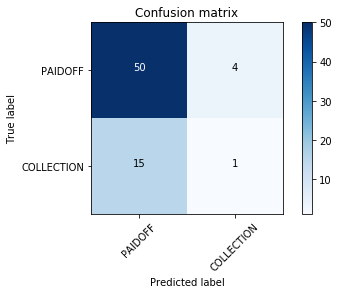

In [54]:
svm_model_rbf = svm.SVC(kernel = "rbf")
svm_model_rbf.fit(x_train, y_train)
svm_model_rbf_prediction = svm_model_rbf.predict(x_test)

# Compute confusion matrix with a RBF kernel
cnf_matrix = metrics.confusion_matrix(y_test, svm_model_rbf_prediction, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision = 2)

print(metrics.classification_report(y_test, svm_model_rbf_prediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'], normalize= False,  title='Confusion matrix')

In [55]:
print("F1-score using a RBF kernel:", metrics.f1_score(y_test, svm_model_rbf_prediction, average='weighted') )
print("Accuracy using a RBF kernel:", metrics.jaccard_similarity_score(y_test, svm_model_rbf_prediction))

F1-score using a RBF kernel: 0.670028011204
Accuracy using a RBF kernel: 0.728571428571


<h2> SVM model using a lineal kernel </h2>

             precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        16
    PAIDOFF       0.77      0.98      0.86        54

avg / total       0.59      0.76      0.66        70

Confusion matrix, without normalization
[[53  1]
 [16  0]]


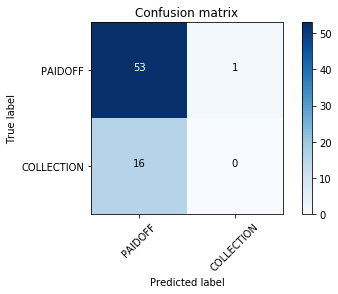

In [56]:
svm_model_lineal = svm.SVC(kernel = "linear")
svm_model_lineal.fit(x_train, y_train)
svm_model_lineal_prediction = svm_model_lineal.predict(x_test)

# Compute confusion matrix with a RBF kernel
cnf_matrix_lineal = metrics.confusion_matrix(y_test, svm_model_lineal_prediction, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision = 2)

print(metrics.classification_report(y_test, svm_model_lineal_prediction))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lineal, classes=['PAIDOFF','COLLECTION'], normalize= False,  title='Confusion matrix')

In [57]:
print("F1-score using a lineal kernel:", metrics.f1_score(y_test, svm_model_lineal_prediction, average='weighted') )
print("Accuracy using a lineal kernel:", metrics.jaccard_similarity_score(y_test, svm_model_lineal_prediction))

F1-score using a lineal kernel: 0.664808362369
Accuracy using a lineal kernel: 0.757142857143


# Logistic Regression

Using a 'liblinear' solver

In [125]:
logr_liblinear = LogisticRegression(C=0.1, solver='liblinear').fit(x_train, y_train)
logr_liblinear_pred = logr_liblinear.predict(x_test)
logr_liblinear_pred_prob = logr_liblinear.predict_proba(x_test)

print("F1-score using a lineal kernel:", metrics.f1_score(y_test, logr_liblinear_pred, average='weighted') )
print("Accuracy using a lineal kernel:", metrics.jaccard_similarity_score(y_test, logr_liblinear_pred))
print("Logloss :", metrics.log_loss(y_test, logr_liblinear_pred_prob))

F1-score using a lineal kernel: 0.730534161491
Accuracy using a lineal kernel: 0.757142857143
Logloss : 0.463642909803


Using a 'sag' solver

In [124]:
logr_sag = LogisticRegression(C=0.1, solver='sag').fit(x_train, y_train)
logr_sag_pred = logr_sag.predict(x_test)
logr_sag_pred_prob = logr_sag.predict_proba(x_test)

print("F1-score using a lineal kernel:", metrics.f1_score(y_test, logr_sag_pred, average='weighted') )
print("Accuracy using a lineal kernel:", metrics.jaccard_similarity_score(y_test, logr_sag_pred))
print("Logloss :", metrics.log_loss(y_test, logr_sag_pred_prob))

F1-score using a lineal kernel: 0.671889400922
Accuracy using a lineal kernel: 0.771428571429
Logloss : 0.445586958889


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluation using Test set

First, download and load the test set:

In [74]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-04-05 16:26:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-04-05 16:26:48 (716 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [75]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Test set pre-processing

In [82]:
test_df = pd.read_csv('loan_test.csv')
# convert date time
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

# evaulate weekend field
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

# male = 0 and female = 1
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# education level
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature, pd.get_dummies(test_df['education'])], axis=1)
test_feature.drop(['Master or Above'], axis = 1, inplace=True)

test_X = preprocessing.StandardScaler().fit(test_feature).transform(test_feature) # normalize the test data
test_y = test_df['loan_status'].values # and target result

<h3> KNN Model </h3>

In [131]:
knn_pred = knn.predict(test_X)
knn_jac = metrics.jaccard_similarity_score(test_y, knn_pred)
knn_f1 = metrics.f1_score(test_y, knn_pred, average='weighted')
print("Train set jaccard_similarity_score: ", knn_jac)
print("Train set f1_score: ", knn_f1)

Train set jaccard_similarity_score:  0.685185185185
Train set f1_score:  0.681298582533


<h3> Decision Tree Model </h3>

In [132]:
decision_tree_pred = decision_tree_model.predict(test_X)
decision_tree_jac = metrics.jaccard_similarity_score(test_y, decision_tree_pred)
decision_tree_f1 = metrics.f1_score(test_y, decision_tree_pred, average='weighted')
print("Train set jaccard_similarity_score: ", decision_tree_jac)
print("Train set f1_score: ", decision_tree_f1)

Train set jaccard_similarity_score:  0.833333333333
Train set f1_score:  0.831275720165


<h3> SVM Model </h3>

In [133]:
svm_rbf_pred = svm_model_rbf.predict(test_X)
svm_jac = metrics.jaccard_similarity_score(test_y, svm_rbf_pred)
svm_f1 = metrics.f1_score(test_y, svm_rbf_pred, average='weighted')
print("Train set jaccard_similarity_score: ", svm_jac)
print("Train set f1_score: ", svm_f1)

Train set jaccard_similarity_score:  0.722222222222
Train set f1_score:  0.649141707965


<h3> Logistic Regression Model </h3>

In [143]:
lr_pred = logr_liblinear.predict(test_X)
lr_prob_pred = logr_liblinear.predict_proba(test_X)
lr_jac = metrics.jaccard_similarity_score(test_y, lr_pred)
lr_f1 = metrics.f1_score(test_y, lr_pred, average='weighted')
lr_logloss = metrics.log_loss(test_y, lr_prob_pred)
print("Train set jaccard_similarity_score::", lr_jac)
print("F1-score using a lineal kernel:",  lr_f1)
print("Logloss :", lr_logloss)

Train set jaccard_similarity_score:: 0.814814814815
F1-score using a lineal kernel: 0.77366255144
Logloss : 0.471134929814


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

List of evaluation metrics score

In [141]:
list_jc = [knn_jac, decision_tree_jac, svm_jac, lr_jac]
list_fs = [knn_f1, decision_tree_f1 ,svm_f1 ,lr_f1]
list_ll = ['NA', 'NA', 'NA', lr_logloss]

In [144]:
df_scores = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df_scores.columns = ['Jaccard']
df_scores.insert(loc=1, column = 'F1-score', value = list_fs)
df_scores.insert(loc=2, column = 'LogLoss', value = list_ll)
df_scores.columns.name = 'Algorithm'
df_scores

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.685185,0.681299,NA
Decision Tree,0.833333,0.831276,NA
SVM,0.722222,0.649142,NA
Logistic Regression,0.814815,0.773663,0.471135


| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>